In [252]:
import matplotlib.font_manager as font_manager
import matplotlib.dates as matdates
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from os.path import expanduser
import matplotlib as mpl
import seaborn as sns

sns.set_style("ticks")
fontpath = expanduser('~/.local/share/fonts/LinLibertine_DRah.ttf')
prop = font_manager.FontProperties(fname=fontpath)

params = {
    "axes.titlesize" : 16,
    'axes.labelsize': 12,
    'font.size': 12,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'font.family': prop.get_name(),
    'text.usetex': True
}
mpl.rcParams.update(params)

pt = ["#E8E8E8", "#D1D1D1", "#B9B9B9", "#A2A2A2", "#8B8B8B", "#747474", "#5D5D5D", 
 "#464646", "#2E2E2E", "#171717", "#000000"]

pt = { r:pt[r] for r in list(range(10))}

In [202]:
from helpers import jaccard, populate_bin_with_channel, add_user_to_bin, bins, bins_t_o,  bins_y_o, bin_to_df, \
                    add_user_categories_to_bin, mean_confidence_interval, normalize_user_bins, \
                    find_users_constraint, find_users_other_bin, estimate_for_users

In [141]:
from helpers import jaccard, populate_bin_with_channel, add_user_to_bin, bins, bins_t_o,  bins_y_o, bin_to_df, \
                    add_user_categories_to_bin, mean_confidence_interval, normalize_user_bins, \
                    find_users_constraint, find_users_other_bin, estimate_for_users
from matplotlib.lines import Line2D
from sqlitedict import SqliteDict
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import pandas as pd

def correct_cats(i, df_l):
    cat = df_l.loc[i["subreddit"],"category"]
    i["category"] = cat
    return i

def add_user_categories_to_bin(b, user, category, timestamp_v):
    for lower, upper in b.keys():
        if upper > timestamp_v >= lower:
            user_at_b = b[(lower, upper)].get(user, {"pua": 0, "incels": 0, "trp": 0,
                                                     "health": 0, "mgtow": 0, "mra": 0})
            cat_at_b = user_at_b.get(category, 0)
            cat_at_b += 1
            user_at_b[category] = cat_at_b
            b[(lower, upper)][user] = user_at_b
            break

def estimate_for_users(b, key, users_to_track, estimate):
    return estimate([b[key][user] for user in users_to_track])

In [142]:
# Read channels
channel_dict = SqliteDict("/data/incels_helpers/channel_dict.sqlite", tablename="channels")
authors_dict = SqliteDict("/data/incels_helpers/authors_dict.sqlite", tablename="authors")
df_labels = pd.read_csv("./labels.csv")
cats = ["pua", "incels", "trp", "health", "mgtow", "mra"]
df_labels = df_labels.set_index("subreddits")
bin_users = {b:dict() for b in bins_y_o}

In [143]:
min_num_users = 1
for idx, (key, item) in enumerate(authors_dict.items()):
    if idx % 1000 == 0:
        print(idx)
    relevant_items = [correct_cats(i, df_labels) for i in item]
    if len(relevant_items) < min_num_users:
        continue
    for comment in relevant_items:
        add_user_categories_to_bin(bin_users, key, comment["category"], comment["timestamp"] * 1000)

normalize_user_bins(bin_users)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


1164000
1165000
1166000
1167000
1168000
1169000
1170000
1171000
1172000


In [206]:
targets_constraints = {
    cat: [(lambda x: x[c2] == 1, c2) for c2 in [c3 for c3 in cats if c3 != cat]] for cat in cats
}
targets_constraints

{'pua': [(<function __main__.<dictcomp>.<listcomp>.<lambda>(x)>, 'incels'),
  (<function __main__.<dictcomp>.<listcomp>.<lambda>(x)>, 'trp'),
  (<function __main__.<dictcomp>.<listcomp>.<lambda>(x)>, 'health'),
  (<function __main__.<dictcomp>.<listcomp>.<lambda>(x)>, 'mgtow'),
  (<function __main__.<dictcomp>.<listcomp>.<lambda>(x)>, 'mra')],
 'incels': [(<function __main__.<dictcomp>.<listcomp>.<lambda>(x)>, 'pua'),
  (<function __main__.<dictcomp>.<listcomp>.<lambda>(x)>, 'trp'),
  (<function __main__.<dictcomp>.<listcomp>.<lambda>(x)>, 'health'),
  (<function __main__.<dictcomp>.<listcomp>.<lambda>(x)>, 'mgtow'),
  (<function __main__.<dictcomp>.<listcomp>.<lambda>(x)>, 'mra')],
 'trp': [(<function __main__.<dictcomp>.<listcomp>.<lambda>(x)>, 'pua'),
  (<function __main__.<dictcomp>.<listcomp>.<lambda>(x)>, 'incels'),
  (<function __main__.<dictcomp>.<listcomp>.<lambda>(x)>, 'health'),
  (<function __main__.<dictcomp>.<listcomp>.<lambda>(x)>, 'mgtow'),
  (<function __main__.<dictco

## Trajectories Front (Alt-right)


In [494]:
targets_constraints = {
    "incels":[
        (lambda x: x["incels"] == 0, "all"),
        (lambda x: x["mra"] > 0, "mra"),
        (lambda x: x["trp"] > 0, "trp"),
        (lambda x: x["pua"] > 0, "pua"),
        (lambda x: x["mgtow"] > 0, "mgtow")
    ],
    "mra":[
        (lambda x: x["incels"] > 0, "incels"),
        (lambda x: x["mra"] == 0, "all"),
        (lambda x: x["trp"] > 0, "trp"),
        (lambda x: x["pua"] > 0, "pua"),
        (lambda x: x["mgtow"] > 0, "mgtow")
    ],
    "trp":[
        (lambda x: x["incels"] > 0, "incels"),
        (lambda x: x["mra"] > 0, "mra"),
        (lambda x: x["trp"] == 0, "all"),
        (lambda x: x["pua"] > 0, "pua"),
        (lambda x: x["mgtow"] > 0, "mgtow")
    ],
    "pua":[
        (lambda x: x["incels"] > 0, "incels"),
        (lambda x: x["mra"] > 0, "mra"),
        (lambda x: x["trp"] > 0, "trp"),
        (lambda x: x["pua"] == 0, "all"),
        (lambda x: x["mgtow"] > 0, "mgtow")
    ],
    "mgtow":[
        (lambda x: x["incels"] > 0, "incels"),
        (lambda x: x["mra"] > 0, "mra"),
        (lambda x: x["trp"] > 0, "trp"),
        (lambda x: x["pua"] > 0, "pua"),
        (lambda x: x["mgtow"] == 0, "all")
    ]
}

estimates = []
for target, lamb_cname in targets_constraints.items():
    for lamb, cname in lamb_cname:
        print(cname)
        already_tracked = set()

        for start in list(range(10)):
            print(bins_t_o[start])
            non_radical = find_users_constraint(bin_users, bins_y_o[start], lamb)
            non_radical = set(non_radical) - set(already_tracked)
            already_tracked = already_tracked.union(non_radical)
            non_radical = list(non_radical)

            tmp = estimate_for_users(bin_users, bins_y_o[start], non_radical, 
                                     lambda xs: mean_confidence_interval([x[target] * x["count"] >= 1 for x in xs]))

            tmp["idxo"] = start
            tmp["idx"] = bins_y_o[start]
            tmp["start"] = start
            tmp["target"] = target
            tmp["numUsersStart"] = len(non_radical)
            tmp["numUsersTracked"] = len(non_radical)
            tmp["pUsersTracked"] = 1
            tmp["constraint"] = cname
            tmp["numUsersInfected"] = 0
            tmp["pUsersInfected"] = 0
            tmp["total"] = 0

            print("Num users start:", len(non_radical))
            estimates.append(tmp)
            count = 0
            for bin_key in bins_y_o[start+1:]:
                count += 1
                tracked_users = find_users_other_bin(bin_users, bin_key, non_radical)

                users_who_watched_ar = find_users_constraint(bin_users, bin_key, 
                          lambda x: x[target] * x["count"] >= 1)

                tmp = estimate_for_users(bin_users, bin_key, tracked_users,
                                     lambda xs: mean_confidence_interval([x[target] * x["count"] >= 1 for x in xs]))

                tmp["idx"] =  bin_key
                tmp["idxo"] = start + count
                tmp["start"] = start
                tmp["target"] = target
                tmp["numUsersStart"] = len(non_radical)
                tmp["numUsersTracked"] = len(tracked_users)
                if len(non_radical) == 0:
                    tmp["pUsersTracked"] = 0
                else:
                    tmp["pUsersTracked"] = len(tracked_users)/len(non_radical)
                tmp["numUsersInfected"] = len(tracked_users) * tmp["mean"]
                tmp["pUsersInfected"] =  tmp["numUsersInfected"]/len(users_who_watched_ar)
                tmp["constraint"] = cname

                estimates.append(tmp)
            
df = pd.DataFrame(estimates)


all
2008
Num users start: 1712


/home/manoel/miniconda3/envs/rad/lib/python3.7/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in double_scalars


2009
Num users start: 4492
2010
Num users start: 27006
2011
Num users start: 40901
2012
Num users start: 82067
2013
Num users start: 96527
2014
Num users start: 119508
2015
Num users start: 122958
2016
Num users start: 144111
2017
Num users start: 178056
mra
2008
Num users start: 1086
2009
Num users start: 2233
2010
Num users start: 12673
2011
Num users start: 12553
2012
Num users start: 24596
2013
Num users start: 20255
2014
Num users start: 23337
2015
Num users start: 21490
2016
Num users start: 29327
2017
Num users start: 25645
trp
2008
Num users start: 0


/home/manoel/miniconda3/envs/rad/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/manoel/miniconda3/envs/rad/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/manoel/miniconda3/envs/rad/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/manoel/miniconda3/envs/rad/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/manoel/miniconda3/envs/rad/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2009
Num users start: 0
2010
Num users start: 0
2011
Num users start: 0
2012
Num users start: 1726
2013
Num users start: 15600
2014
Num users start: 25620
2015
Num users start: 24429
2016
Num users start: 27855
2017
Num users start: 27499
pua
2008
Num users start: 37
2009
Num users start: 790
2010
Num users start: 8174
2011
Num users start: 15416
2012
Num users start: 24571
2013
Num users start: 21296
2014
Num users start: 18861
2015
Num users start: 17107
2016
Num users start: 14005
2017
Num users start: 15410
mgtow
2008
Num users start: 0
2009
Num users start: 0
2010
Num users start: 0
2011
Num users start: 0
2012
Num users start: 63
2013
Num users start: 353
2014
Num users start: 1806
2015
Num users start: 4701
2016
Num users start: 11434
2017
Num users start: 23838
incels
2008
Num users start: 0
2009
Num users start: 0
2010
Num users start: 1367
2011
Num users start: 12944
2012
Num users start: 13412
2013
Num users start: 9616
2014
Num users start: 8962
2015
Num users start: 9006
2

In [492]:
df = df[df.numUsersTracked > 100]

In [ ]:
fig = plt.figure(
    constrained_layout=False,
    figsize=(16.5, 7.7),
)

gs = fig.add_gridspec(nrows=5, ncols=5, wspace=0.05, hspace=0.075, top=0.90)

ylims = [ 
    (-0.036, 0.396), 
    (-0.036, 0.396), 
    (-0.036, 0.396), 
    (-0.036, 0.396), 
    (-0.036, 0.396), 
]

yticklabels = [
    ["0\%", "12\%", "24\%", "36\%"],
    ["0\%", "12\%", "24\%", "36\%"],
    ["0\%", "12\%", "24\%", "36\%"],
    ["0\%", "12\%", "24\%", "36\%"],
    ["0\%", "12\%", "24\%", "36\%"]
]


yticks = [ 
    [0, 0.12, 0.24, 0.36], 
    [0, 0.12, 0.24, 0.36], 
    [0, 0.12, 0.24, 0.36], 
    [0, 0.12, 0.24, 0.36], 
    [0, 0.12, 0.24, 0.36]
]

axs = []
for i in range(25):
    axs.append(fig.add_subplot(gs[i//5, i%5]))

    

for idy, (target, lamb_cname) in enumerate(targets_constraints.items()):
    for idx, (_, cname) in enumerate(lamb_cname):
        
        print(idx, idy, target, cname)
        ax = axs[idx + idy*5]
        if cname == "all":
            df_tmp = df[(df.constraint != target) & (df.target == target)]

        else:
            df_tmp = df[(df.constraint == cname) & (df.target == target)]
        df_tmp = df_tmp.fillna(0)


        sns.lineplot(x="idxo", y="mean", hue="start", data=df_tmp,  lw=2, legend=False, ax=ax,
                     palette=pt)
#         ax.get_legend().remove()
        ax.set_xlabel("")
        ax.set_ylabel("")
        
        if idy == 0:
            ax.set_title("From: "+ (cname if cname != "all" else target), fontsize=14)

        if idx == 0:
            ax.set_ylabel("To: "+  target, fontsize=14)
            ax.set_yticklabels(yticklabels[idy])
        else:
            ax.set_ylabel("")
            ax.set_yticklabels([])
        
        if idy == 4:
            ax.set_xticklabels([v[-2:] for v in bins_t_o], rotation=15)
        else:
            ax.set_xticklabels([])
            
        ax.set_ylim(ylims[idy])
        ax.set_xticks(list(range(11)))
        ax.set_yticks(yticks[idy])
        ax.xaxis.grid(color="#DCDCDC", linestyle='dashed')
        ax.yaxis.grid(color="#DCDCDC", linestyle='dashed')
        
custom_lines = [
    Line2D([0], [0], color=c, lw=4) for k, c in pt.items() 
]

axs[2].legend(custom_lines, ["Start: {}".format(b) for b in bins_t_o], 
          loc="center", ncol=5, bbox_to_anchor=(0.5, 1.5), frameon=False, fontsize=12)

fig.savefig("user_migra_reddit.pdf", bbox_inches='tight')
fig.savefig("user_migra_reddit.png", bbox_inches='tight')

0 0 incels all
1 0 incels mra
2 0 incels trp
3 0 incels pua
4 0 incels mgtow
0 1 mra incels
1 1 mra all
2 1 mra trp
3 1 mra pua
4 1 mra mgtow
0 2 trp incels
1 2 trp mra
2 2 trp all
3 2 trp pua
4 2 trp mgtow
0 3 pua incels
1 3 pua mra
2 3 pua trp
3 3 pua all
4 3 pua mgtow
0 4 mgtow incels
1 4 mgtow mra
2 4 mgtow trp
3 4 mgtow pua
4 4 mgtow all


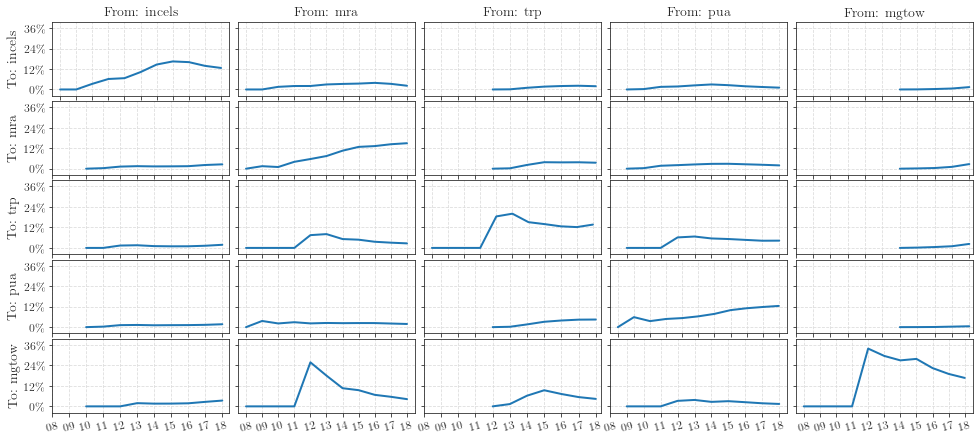

In [476]:
fig = plt.figure(
    constrained_layout=False,
    figsize=(16.5, 7),
)

gs = fig.add_gridspec(nrows=5, ncols=5, wspace=0.05, hspace=0.075, top=0.90)

ylims = [ 
    (-0.036, 0.396),
    (-0.036, 0.396),
    (-0.036, 0.396),
    (-0.036, 0.396),
    (-0.036, 0.396)
]

yticklabels = [
    ["0\%", "12\%", "24\%", "36\%"],
    ["0\%", "12\%", "24\%", "36\%"],
    ["0\%", "12\%", "24\%", "36\%"],
    ["0\%", "12\%", "24\%", "36\%"],
    ["0\%", "12\%", "24\%", "36\%"]
]

yticks = [ 
    [0, 0.12, 0.24, 0.36],
    [0, 0.12, 0.24, 0.36],
    [0, 0.12, 0.24, 0.36],
    [0, 0.12, 0.24, 0.36],
    [0, 0.12, 0.24, 0.36]
]

axs = []
for i in range(25):
    axs.append(fig.add_subplot(gs[i//5, i%5]))


for idy, (target, lamb_cname) in enumerate(targets_constraints.items()):
    for idx, (_, cname) in enumerate(lamb_cname):
        ax = axs[idx + idy*5]
        if cname == "all":
            df_tmp = df[(df.constraint == "all") & (df.target == target)]

        else:
            df_tmp = df[(df.constraint == cname) & (df.target == target)]        
        df_tmp = df_tmp.fillna(0)
        df_tmp = df_tmp.groupby(["target", "idxo", "constraint"]).sum().reset_index()
        df.groupby(["target", "idxo", "constraint"]).sum()
        sns.lineplot(x="idxo", y="pUsersInfected", data=df_tmp,  lw=2, legend=False, ax=ax)
        ax.set_xlabel("")
        ax.set_ylabel("")
        
        if idy == 0:
            ax.set_title("From: "+ (cname if cname != "all" else target), fontsize=14)

        if idx == 0:
            ax.set_ylabel("To: "+  target, fontsize=14)
            ax.set_yticklabels(yticklabels[idy])

        else:
            ax.set_ylabel("")
            ax.set_yticklabels([])
        
        if idy == 4:
            ax.set_xticklabels([v[-2:] for v in bins_t_o], rotation=15)
        else:
            ax.set_xticklabels([])
            
        ax.set_ylim(ylims[idy])
        ax.set_yticks(yticks[idy])
        ax.xaxis.grid(color="#DCDCDC", linestyle='dashed')
        ax.yaxis.grid(color="#DCDCDC", linestyle='dashed')
        ax.set_xticks(list(range(11)))
    

0
1
2
3
4


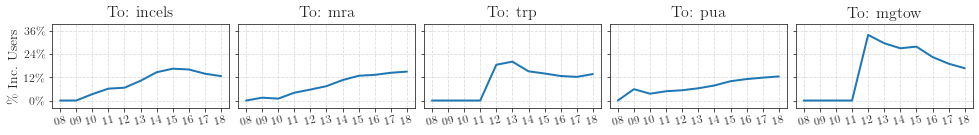

In [490]:
fig = plt.figure(
    constrained_layout=False,
    figsize=(16.5, 1.5),
)

gs = fig.add_gridspec(nrows=1, ncols=5, wspace=0.05, hspace=0.075, top=0.90)

ylims = [ 
    (-0.036, 0.396),
    (-0.036, 0.396),
    (-0.036, 0.396),
    (-0.036, 0.396),
    (-0.036, 0.396)
]

yticklabels = [
    ["0\%", "12\%", "24\%", "36\%"],
    ["0\%", "12\%", "24\%", "36\%"],
    ["0\%", "12\%", "24\%", "36\%"],
    ["0\%", "12\%", "24\%", "36\%"],
    ["0\%", "12\%", "24\%", "36\%"]
]

yticks = [ 
    [0, 0.12, 0.24, 0.36],
    [0, 0.12, 0.24, 0.36],
    [0, 0.12, 0.24, 0.36],
    [0, 0.12, 0.24, 0.36],
    [0, 0.12, 0.24, 0.36]
]

axs = []
for i in range(5):
    axs.append(fig.add_subplot(gs[i]))


for idy, (target, lamb_cname) in enumerate(targets_constraints.items()):
    print(idy)
    for _, (_, cname) in enumerate(lamb_cname):
        ax = axs[idy]
        if cname == "all":
            df_tmp = df[(df.constraint == "all") & (df.target == target)]

        else:
            continue
        df_tmp = df_tmp.fillna(0)
        df_tmp = df_tmp.groupby(["target", "idxo", "constraint"]).sum().reset_index()
        df.groupby(["target", "idxo", "constraint"]).sum()
        sns.lineplot(x="idxo", y="pUsersInfected", data=df_tmp,  lw=2, legend=False, ax=ax)
        ax.set_xlabel("")
        ax.set_ylabel("")
        
        ax.set_title("To: "+ target)
        ax.set_yticks(yticks[idy])
        if idy == 0:
            ax.set_yticklabels(yticklabels[idy])
            ax.set_ylabel("\% Inc. Users", fontsize=14)
        else:
            ax.set_yticklabels([])

        
        ax.set_xticklabels([v[-2:] for v in bins_t_o], rotation=15)
            
        ax.set_ylim(ylims[idy])
        ax.xaxis.grid(color="#DCDCDC", linestyle='dashed')
        ax.yaxis.grid(color="#DCDCDC", linestyle='dashed')
        ax.set_xticks(list(range(11)))
        
fig.savefig("user_migra_reddit_p.pdf", bbox_inches='tight')
fig.savefig("user_migra_reddit_p.png", bbox_inches='tight')